In [1]:
from matplotlib import pyplot as plt
import warnings


warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [2]:
import torch
import numpy as np
from csprng import csprng


rng = csprng(
    N=2**16, C=19, 
    sigma=3.2, devices=[0, 1])

## random round

In [3]:
import numpy as np

coef = torch.from_numpy(
            np.random.random_sample((2**15)).astype(np.float64) * 255 * 2 - 255).to('cuda:0')

rounded_coef = rng.randround(coef)

print(coef[:10], rounded_coef[:10])
print(coef[-10:], rounded_coef[-10:])

tensor([ 186.4939,  202.5013, -162.4717, -234.0877, -187.3646,  177.5913,
         119.9029, -240.8215,  197.7924,  244.8980], device='cuda:0',
       dtype=torch.float64) tensor([ 187,  203, -162, -234, -187,  177,  120, -240,  198,  244],
       device='cuda:0')
tensor([ -35.8686,  232.3221,  171.7903, -198.9598,  119.4353, -172.5961,
          97.0222, -117.7605,  157.6623,  113.8639], device='cuda:0',
       dtype=torch.float64) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


## Discrete Gaussian

In [4]:
dg = rng.discrete_gaussian_copied()

# Check if the same samples across GPUsa.
err = (dg[0].cpu() - dg[1].cpu()).abs().max()
print(err)

tensor(0)


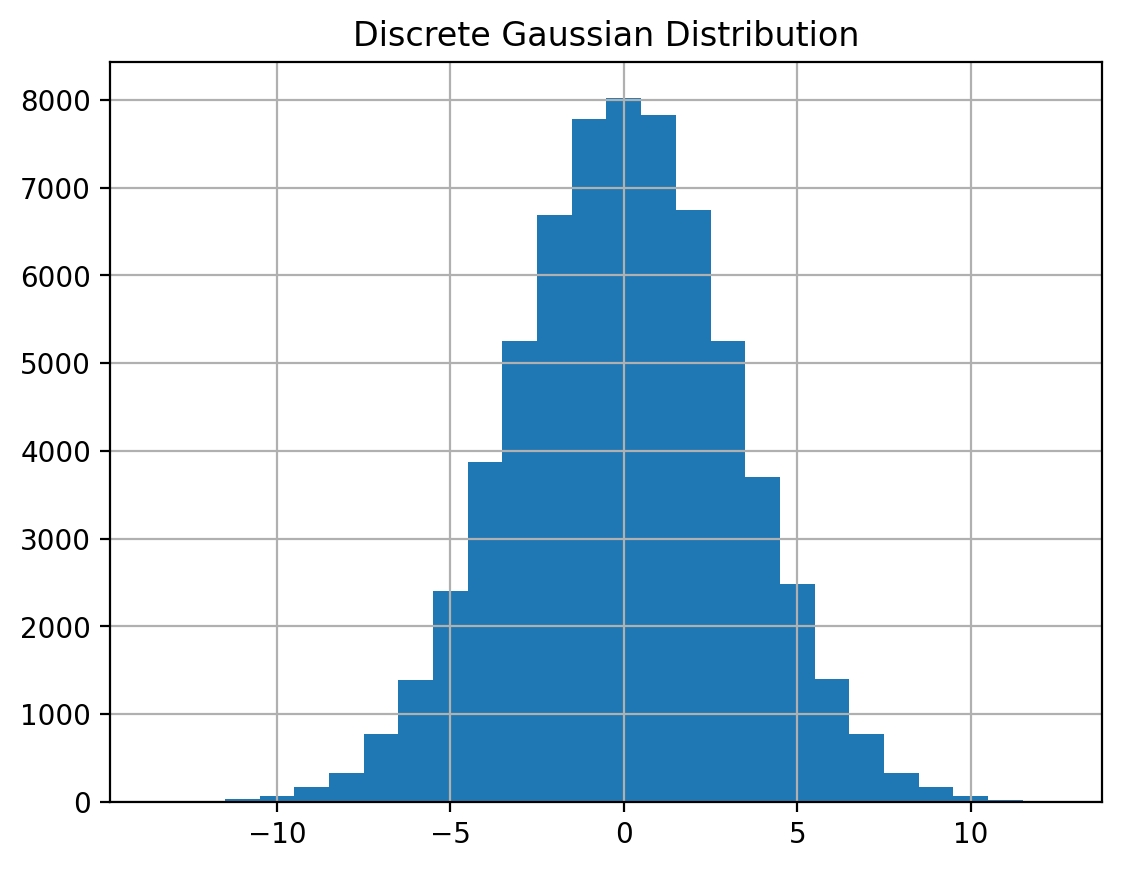

-13 0.0015869140625 13


In [5]:
import matplotlib.pyplot as plt

device_id = 0
series = dg[device_id].squeeze().cpu().numpy()

plt.title("Discrete Gaussian Distribution")
plt.hist(
    series, 
    bins=np.arange(series.min()-0.5, series.max()+0.5)
)
plt.grid()
plt.savefig("./discrete_gaussian.png", dpi=500)
plt.show()
print(series.min(), series.mean(), series.max())

## Randint

In [6]:
q = [list(range(3)), list(range(5))]
urand = rng.randint(amax=q, shift=0)
print(urand,)
print(urand[0].shape)

[tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 1]], device='cuda:0'), tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 1, 1,  ..., 1, 1, 0],
        [2, 2, 2,  ..., 0, 2, 0],
        [1, 3, 1,  ..., 1, 2, 1]], device='cuda:1')]
torch.Size([3, 65536])


In [7]:
q = [list(range(3)), list(range(6))]
urand = rng.randint(amax=q, shift=-1)
print(urand[0],)
print(urand[1],)
print(urand[0].shape)

tensor([[-1, -1, -1,  ..., -1, -1, -1],
        [-1, -1, -1,  ..., -1, -1, -1],
        [ 0,  0,  0,  ..., -1,  0, -1]], device='cuda:0')
tensor([[-1, -1, -1,  ..., -1, -1, -1],
        [-1, -1, -1,  ..., -1, -1, -1],
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  1,  1],
        [-1,  1, -1,  ...,  0,  2,  2],
        [ 1, -1,  3,  ...,  0,  2,  1]], device='cuda:1')
torch.Size([3, 65536])


## Randint (Copied single row)

In [8]:
sk = rng.randint_copied(3, -1)

# Check if the same samples across GPUs.
err = (sk[0].cpu() - sk[1].cpu()).abs().max()
print(err)

tensor(0)


[-1  0  1]


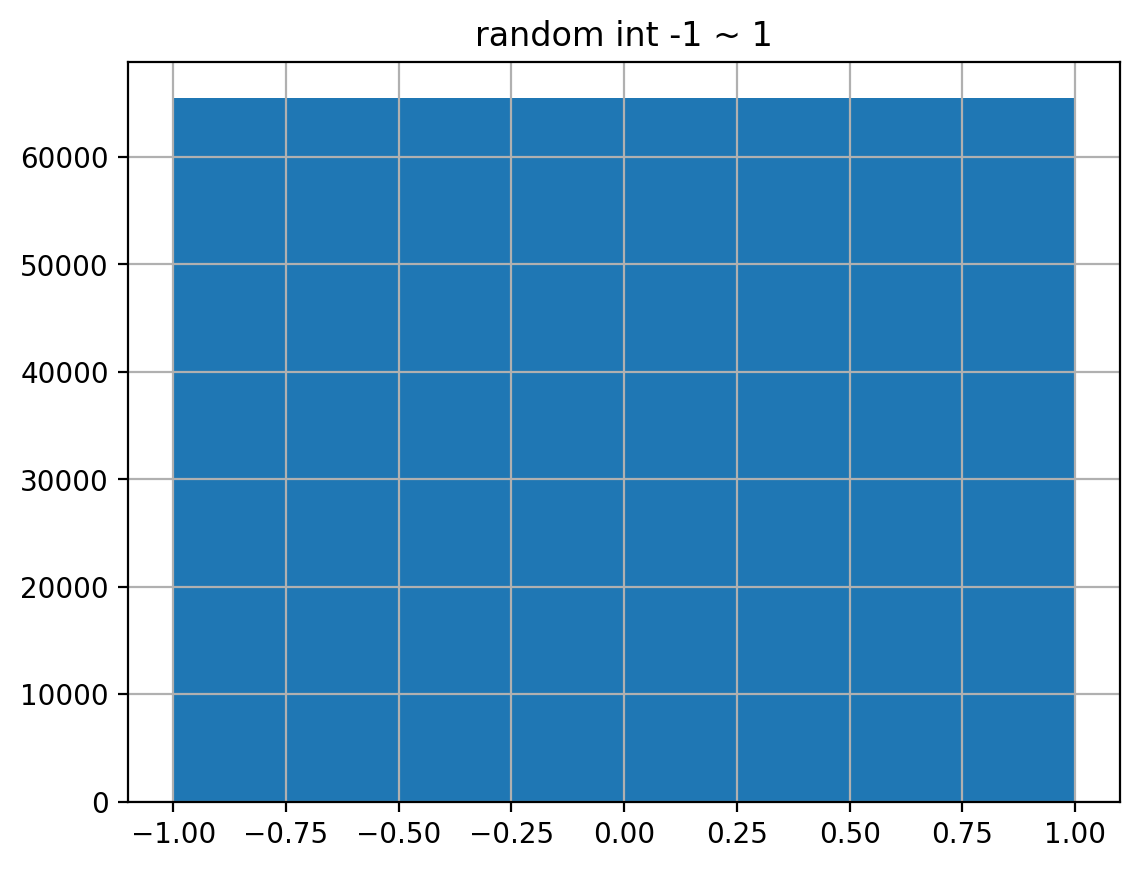

In [9]:
device_id = 0
series = sk[0].squeeze().cpu().numpy()

print(np.unique(series))
plt.title("random int -1 ~ 1")
plt.hist(series, bins=(series.min(), series.max()))
plt.grid()
plt.show()

## Rand Bytes

In [10]:
%%time

rb = rng.randbytes(C=19, L=None)
print(rb[0])
print(rb[0].shape)

tensor([[3079768663, 3453818992,  814629187,  ...,  336653062, 3642161207,
         1598069561],
        [3647332770, 4106053721,  734649727,  ..., 2339008996, 2421416868,
         1294346427],
        [2128373584,  346618816, 3075394877,  ..., 2839062762, 2948760406,
          498663716],
        ...,
        [2851010389, 1896962646, 1499633570,  ...,  164604060,  474284079,
         3628522156],
        [2643353087, 2629617541, 2997689485,  ..., 2246970250, 2230455265,
         2396574691],
        [3767674071, 3919637587, 2352134847,  ..., 1382461115, 2110283749,
         3580220522]], device='cuda:0')
torch.Size([163840, 16])
CPU times: user 5.14 ms, sys: 942 µs, total: 6.08 ms
Wall time: 5.13 ms


In [20]:
urand = rng.randint(q)
x = urand[0][0].cpu().numpy()
x.max(), x.min()

(1, 0)

In [25]:
?rng.randint

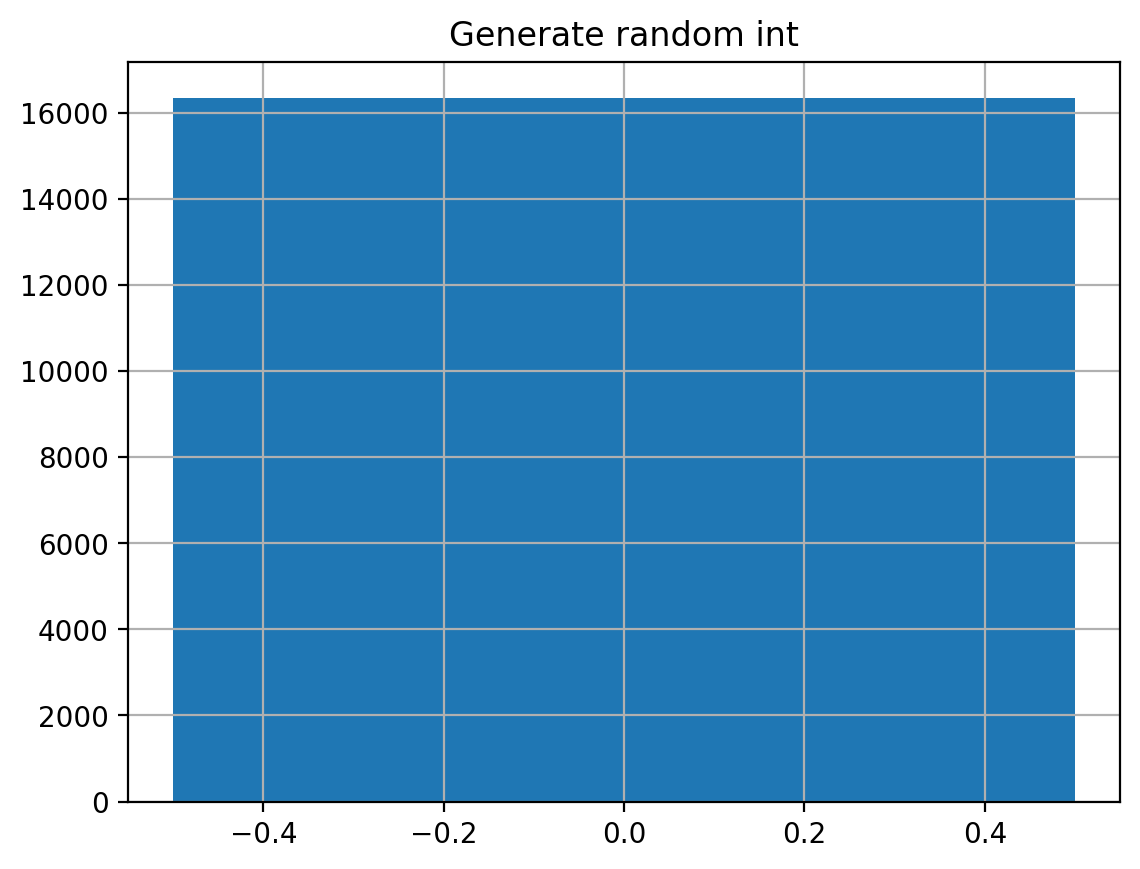

0 1
[0 1]


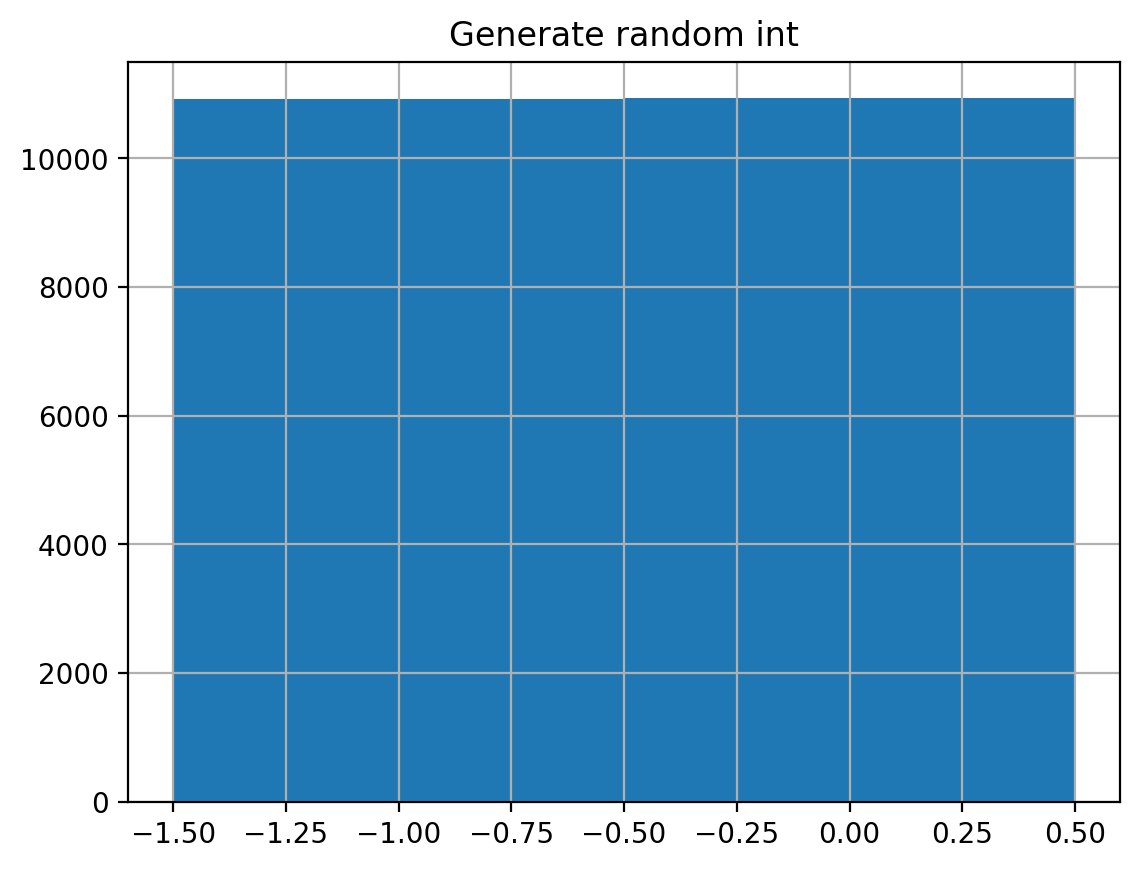

-1 1
[-1  0  1]


In [26]:
# q = [list(range(9)), list(range(9))]
q = [(2, 3), (2022, 2023, 2024)]
urand = rng.randint(amax=q)

x = urand[0][0].cpu().numpy()

plt.title("Generate random int")
plt.hist(
    x, 
    bins=np.arange(x.min()-0.5, x.max()+0.5)
)
plt.grid()
plt.show()

print(x.min(), x.max())
print(np.unique(x))


#############################################
q = [(2, 3), (2022, 2023, 2024)]
urand = rng.randint(q, shift=-1)

x = urand[0][1].cpu().numpy()

plt.title("Generate random int")
plt.hist(
    x, 
    bins=np.arange(x.min()-0.5, x.max()+0.5)
)
plt.grid()
plt.show()

print(x.min(), x.max())
print(np.unique(x))

## Numpy uniform random exhibits inferior distribution.

The histogram must be (theoretically) FLAT.

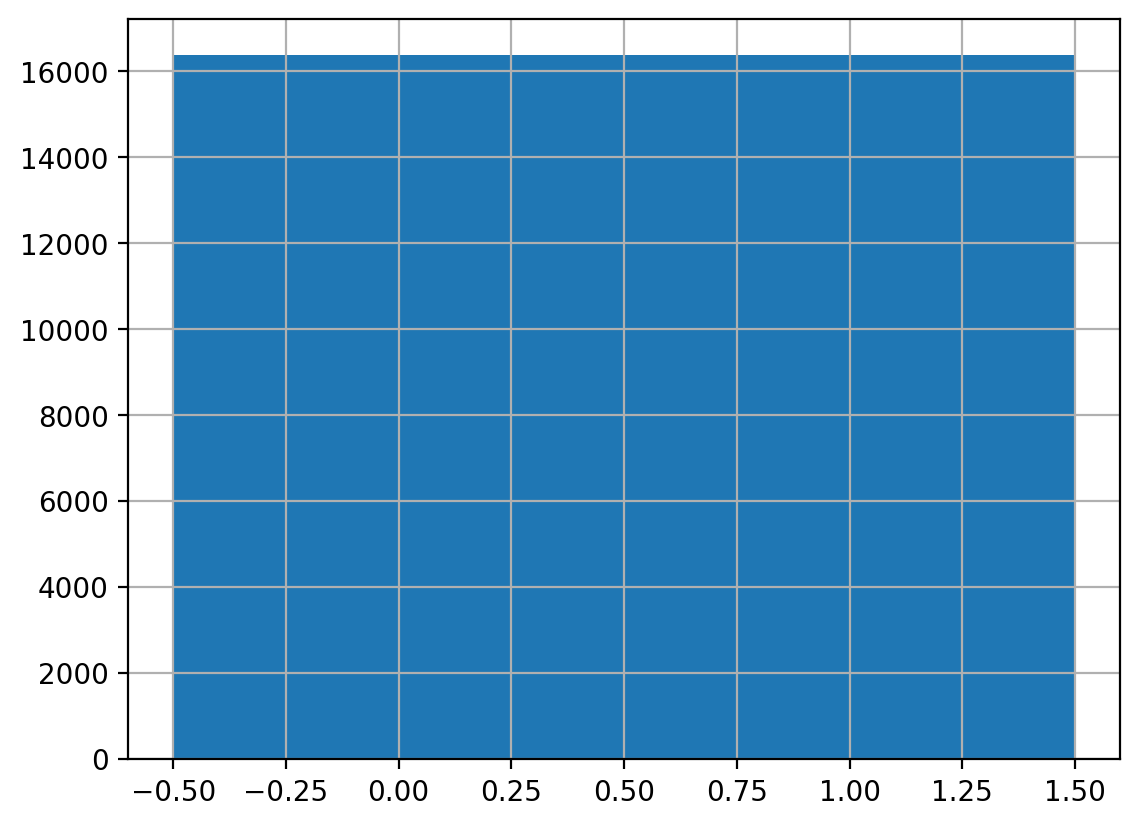

{0, 1}


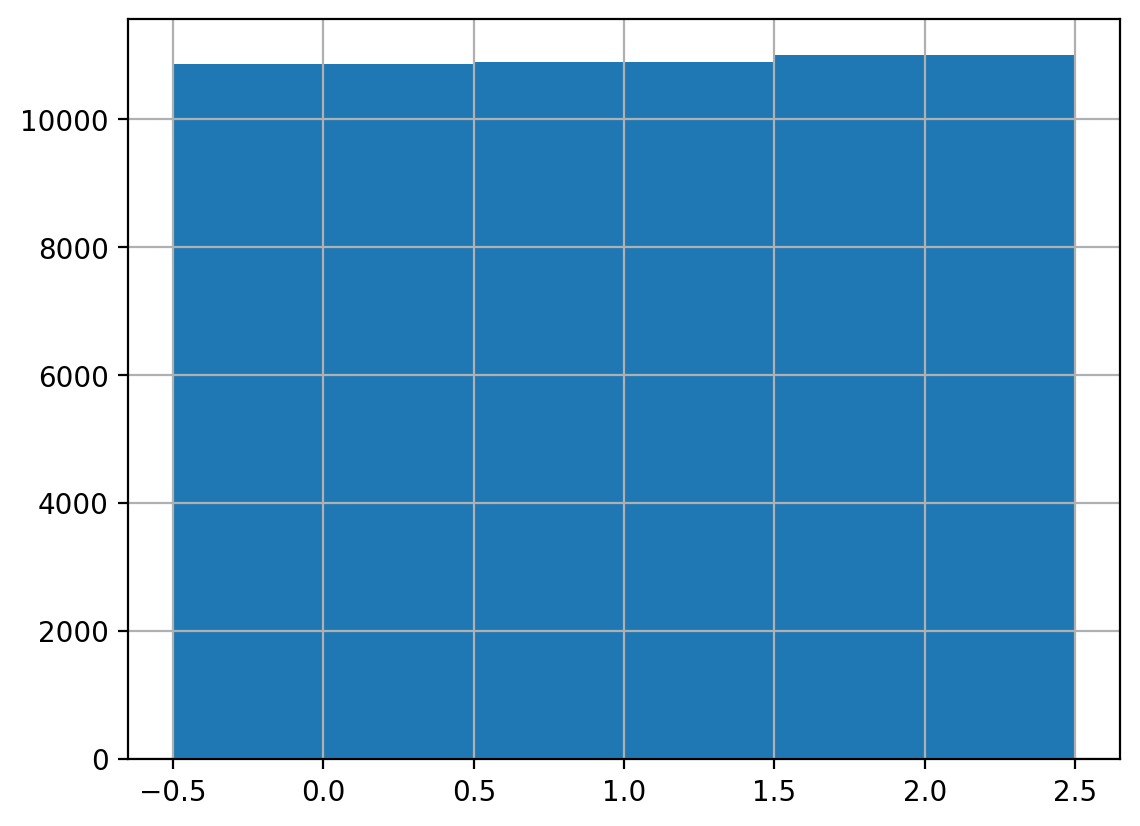

{0, 1, 2}


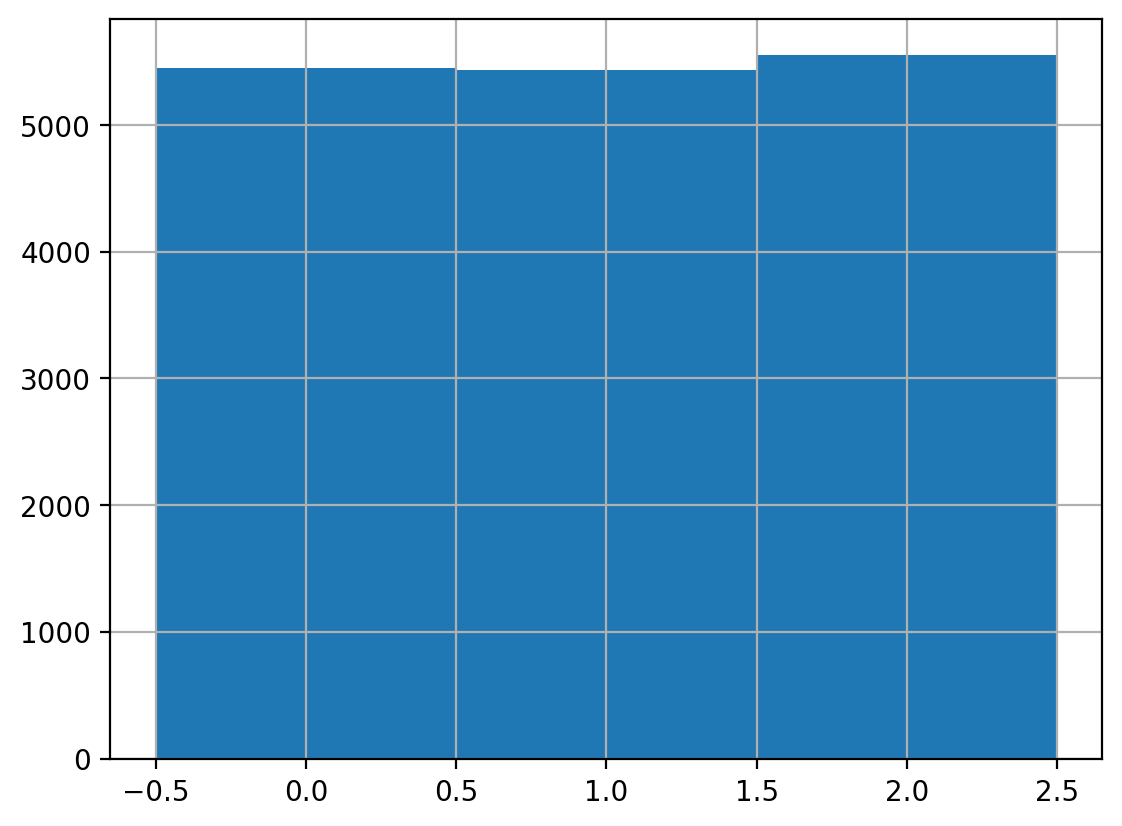

{0, 1, 2, -2, -3, -1}


In [12]:
x = np.random.randint(0, 2, (2**15))

plt.hist(x, bins=np.arange(-0.5, x.max()+1))
plt.grid()
plt.show()
print(set(x))

##################################################
x = np.random.randint(0, 3, (2**15,))

plt.hist(x, bins=np.arange(-0.5, x.max()+1))
plt.grid()
plt.show()
print(set(x))

# #################################################
x = np.random.randint(-3, 3, (2**15,))

plt.hist(x, bins=np.arange(-0.5, x.max()+1))
plt.grid()
plt.show()
print(set(x))

In [13]:
import torch
from discrete_gaussian_sampler import build_CDT_binary_search_tree
from csprng import csprng
import discrete_gaussian_cuda

rng = csprng(C=[10, 9])

btree, btree_ptr, btree_size, tree_depth = build_CDT_binary_search_tree()

result = discrete_gaussian_cuda.discrete_gaussian_fast(rng.states, btree_ptr, btree_size, tree_depth, rng.inc)
